In [1]:
import pandas as pd
import re
import unicodedata
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter
import networkx as nx
from nltk import bigrams

In [2]:
def excel_to_df(excel):
    return pd.read_excel(excel)

df_cnn = excel_to_df('data/Summarized/dataset_cnn_summarized.xlsx')
df_kompas = excel_to_df('data/Summarized/dataset_kompas_summarized.xlsx')
df_tempo = excel_to_df('data/Summarized/dataset_tempo_summarized.xlsx')
df_turnbackhoax = excel_to_df('data/Summarized/dataset_turnbackhoax_summarized.xlsx')

In [3]:
df_cnn= df_cnn[df_cnn['cleaned'].isna() == False]
df_kompas = df_kompas[df_kompas['cleaned'].isna() == False]
df_tempo = df_tempo[df_tempo['cleaned'].isna() == False]
df_turnbackhoax = df_turnbackhoax[df_turnbackhoax['cleaned'].isna() == False]

In [4]:
df_cnn['title'] = df_cnn['title'].astype(str)
df_kompas['title'] = df_kompas['title'].astype(str)
df_tempo['title'] = df_tempo['title'].astype(str)
df_turnbackhoax['title'] = df_turnbackhoax['title'].astype(str)

In [5]:
df_pre = pd.concat([df_turnbackhoax, df_tempo,df_cnn, df_kompas], ignore_index=True)

In [7]:
df_pre.columns

Index(['index', 'title', 'raw timestamp', 'original', 'tags', 'author', 'url',
       'politik', 'raw narasi', 'cleaned', 'label', 'timestamp',
       'cleaned token length', 'summarized'],
      dtype='object')

In [8]:
data = df_pre.drop(['index', 'raw timestamp', 'original', 'tags', 'author', 'url',
      'timestamp','raw narasi','politik','cleaned token length', 'summarized'], axis=1)

In [9]:
data

,title,cleaned,label
0,[SALAH] Anies Baswedan Dekat Dengan Aliran Krs...,BISA DILIHAT SI ONTA YAMAN NGGAK PEDULI ITU AP...,1
1,[SALAH] Hakim Wahyu Iman Santoso Alami Kecelak...,ini bener gasih?? Ya Allah gimna keadaan pa ha...,1
2,[SALAH] GAMBAR MEGAWATI DAN PUAN BERMAIN SLOT,Nenek lampir pemimpin partai banteng bercula s...,1
3,[SALAH] JONATHAN LATUMAHINA SEORANG NASRANI DA...,gerombolan kulup banyak menyusup ke ormas2 isl...,1
4,[SALAH] PESAN WHATSAPP DARI BMKG YANG KABARKAN...,Diharapkan kepada warga Sumatera Utara agar se...,1
...,...,...,...
27464,Nurul Arifin Ajak Perempuan Terjun ke Dunia Po...,Nurul Arifin Ajak Perempuan Terjun ke Dunia Po...,0
27465,Kebangkitan Lawan Politik Jokowi...,Kebangkitan Lawan Politik Jokowi... Pasangan ...,0
27466,Ridwan Kamil Akui Pilkada DKI Berdampak pada S...,Ridwan Kamil Akui Pilkada DKI Berdampak pada S...,0
27467,Anies Belum Berpikir Apakah Akan Menjadi Anggo...,Anies Belum Berpikir Apakah Akan Menjadi Anggo...,0


In [10]:
import re
import string
import unicodedata
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from multiprocessing import Pool, cpu_count
import pandas as pd
import nltk

# Membuat objek stemmer
factory = StemmerFactory()
stemmer = factory.create_stemmer()


In [18]:
# Fungsi untuk membersihkan teks
def wordopt(text):
    # Menghapus karakter non-ASCII
    text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')

    # Menghapus URL
    text = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', text)

    # Menghapus tanda baca
    text = re.sub(r'[^\w]|_', ' ', text)

    # Menghapus kata yang mengandung angka
    text = re.sub("\S*\d\S*", "", text).strip()

    # Menghapus angka yang berdiri sendiri
    text = re.sub(r"\b\d+\b", " ", text)

    # Mengubah huruf menjadi huruf kecil
    text = text.lower()

    # Menghapus spasi tambahan
    text = re.sub('[\s]+', ' ', text)

    # Menghapus karakter newline dan kata 'advertisement'
    text = re.sub('\n', '', text)

    text = re.sub(r"//t", r"\t", text)
    text = re.sub(r"( )\1+", r"\1", text)
    text = re.sub(r"(\n)\1+", r"\1", text)
    text = re.sub(r"(\r)\1+", r"\1", text)
    text = re.sub(r"(\t)\1+", r"\1", text)
    text = re.sub('salah', '', text)
    text = re.sub('hoax', '', text)
    # text = re.sub('hasil penelusuran', '', text)
    # text = re.sub('penjelasan akun', '', text)
    # text = re.sub('penjelasan beredar', '', text)
    # text = re.sub('berdasarkan hasil', '', text)
    # text = re.sub('masuk kategori', '', text)
    # text = re.sub('orang', '', text)
    # text = re.sub('video', '', text)
    text = re.sub('fitnah', '', text)
    text = re.sub('klarifikasi', '', text)
    text = re.sub('disinformasi', '', text)
    # Menghapus stopwords
    stopword = set(stopwords.words('indonesian'))
    words = text.split()
    words = [word for word in words if word not in stopword]

    return ' '.join(words)

In [19]:
data['title'] = data['title'].apply(wordopt)

In [20]:
from imblearn.under_sampling import RandomUnderSampler

X = data[['title']]
y = data['label']
rus = RandomUnderSampler(random_state=42, replacement=True)# fit predictor and target variable
X_new, y_new = rus.fit_resample(X,y)
X_new = X_new.reset_index(drop=True)
y_new = y_new.reset_index(drop=True)

In [14]:
from collections import Counter

counter = Counter(y_new)
print(counter)

Counter({0: 6524, 1: 6524})


In [21]:
df_new = X_new
df_new['label'] = y_new

In [22]:
df_true = df_new[df_new['label'] == 0]

df_true

,title,label
0,dpr pemerintah siapkan skenario terburuk covid,0
1,sambangi surya paloh airlangga hartarto silatu...,0
2,tolak pengesahan rkuhp aji tanah papua gelar a...,0
3,tito ingatkan jabatan pj gubernur,0
4,mega mengaku gelar doktor tepuk tangan,0
...,...,...
6519,anies baswedan pegang tiket pilpres sosok berp...,0
6520,kpu buka opsi gandeng influencer tingkatkan pa...,0
6521,kode keras foto bareng anies ahy jusuf kalla s...,0
6522,busyro muqoddas kegaduhan politik bersumber is...,0


In [23]:
df_false = df_new[df_new['label'] == 1]

df_false

,title,label
6524,anies baswedan aliran krsiten sesat alpha omeg...,1
6525,hakim wahyu iman santoso alami kecelakaan tung...,1
6526,gambar megawati puan bermain slot,1
6527,jonathan latumahina nasrani penyusup ormas islam,1
6528,pesan whatsapp bmkg kabarkan gunung sinabung m...,1
...,...,...
13043,foto raja salman mengangkat tandu jenazah korb...,1
13044,jokowi dituduh bodoh bersalaman raja saudi,1
13045,jokowi dituduh memasukkan ribuan tenaga kerja ...,1
13046,mata uang rupiah terpuruk,1


In [24]:
# Memisahkan data berdasarkan label
valid_news = df_true[df_true['label'] == 0]['title']
hoax_news = df_false[df_false['label'] == 1]['title']

In [26]:
hoax_news.to_excel('hoax_news.xlsx')

In [27]:
valid_news.to_excel('valid.xlsx')

In [120]:
# Memisahkan data berdasarkan label
valid = data[data['label'] == 0]['title']
hoax = data[data['label'] == 1]['title']

In [86]:
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()


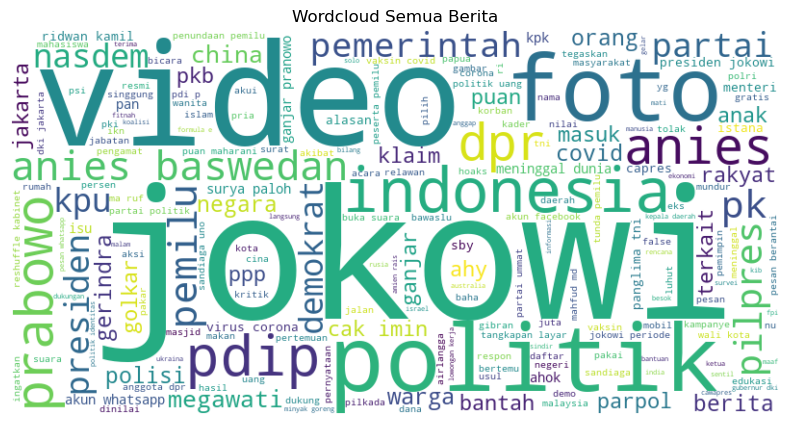

In [122]:
#  Wordcloud untuk berita valid
plot_wordcloud(df_new['title'], 'Wordcloud Semua Berita')

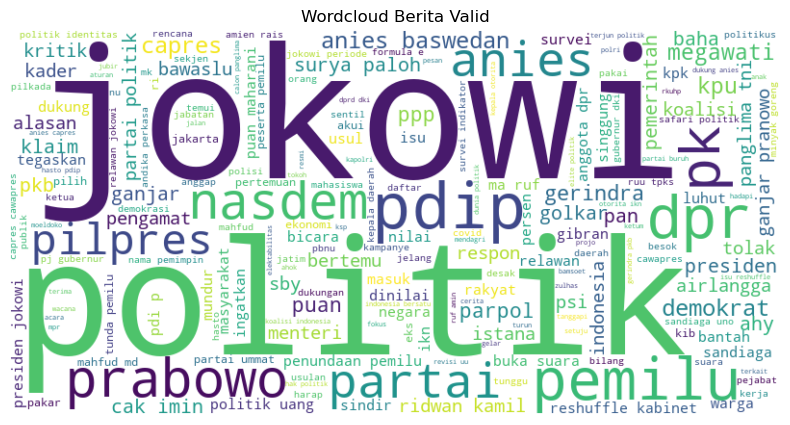

In [123]:
#  Wordcloud untuk berita valid
plot_wordcloud(valid_news, 'Wordcloud Berita Valid')

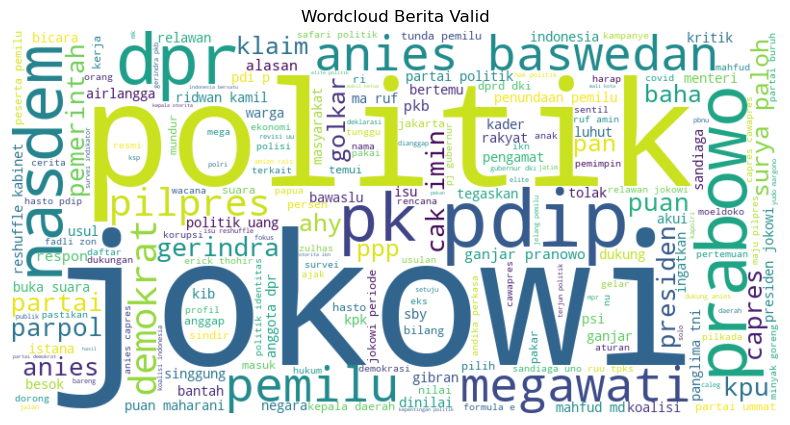

In [124]:
#  Wordcloud untuk berita valid
plot_wordcloud(valid, 'Wordcloud Berita Valid')

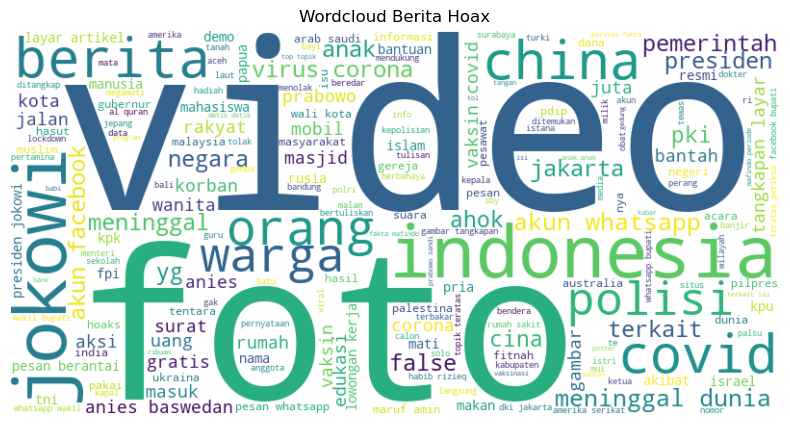

In [125]:
# Wordcloud untuk berita hoax
plot_wordcloud(hoax_news, 'Wordcloud Berita Hoax')

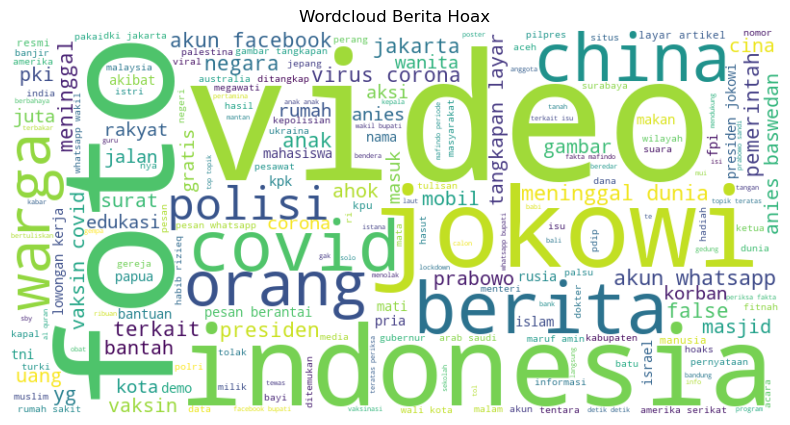

In [126]:
# Wordcloud untuk berita hoax
plot_wordcloud(hoax, 'Wordcloud Berita Hoax')

In [127]:
def get_common_words(text):
    words = ' '.join(text).split()
    word_freq = Counter(words)
    return word_freq.most_common(20)

# Kata-kata umum dalam berita valid
common_words_valid = get_common_words(valid_news)

In [128]:
common_words_hoax = get_common_words(hoax_news)

In [129]:
import matplotlib.pyplot as plt

def plot_common_words(common_words, title):
    words, counts = zip(*common_words)
    plt.figure(figsize=(10, 6))
    plt.bar(words, counts, color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

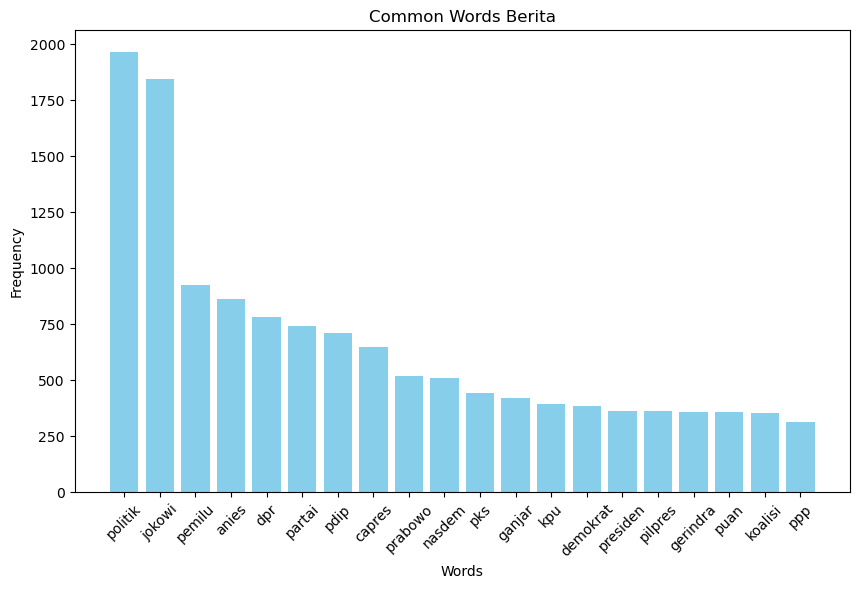

In [136]:
# Kata-kata umum dalam berita valid
common_words_valid = get_common_words(valid_news)
plot_common_words(common_words_valid, 'Common Words Berita')


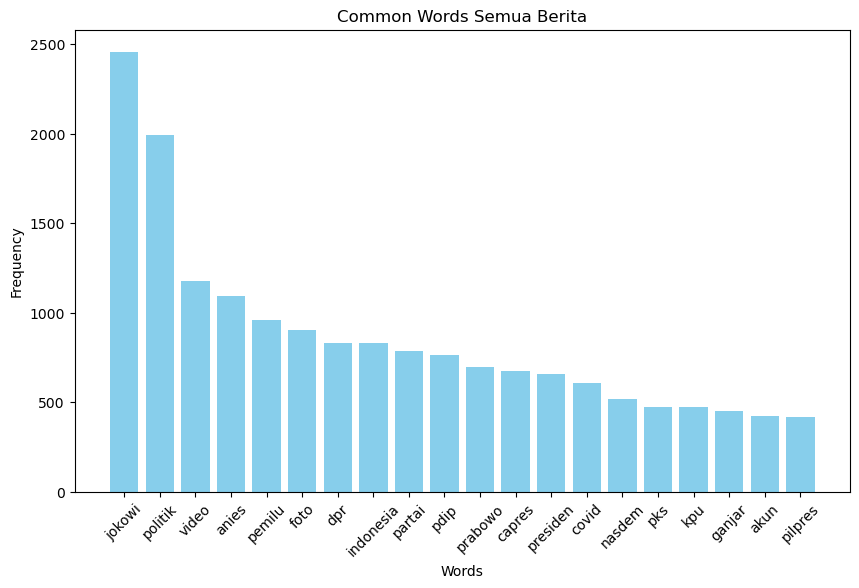

In [133]:
common_words_hoax = get_common_words(df_new['title'])
plot_common_words(common_words_hoax, 'Common Words Semua Berita')

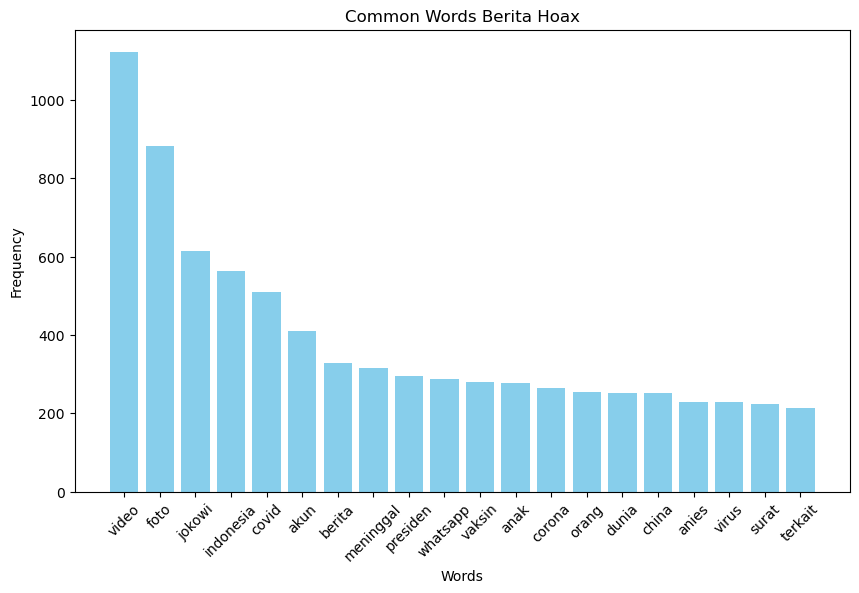

In [132]:
common_words_hoax = get_common_words(hoax_news)
plot_common_words(common_words_hoax, 'Common Words Berita Hoax')

In [103]:
# Fungsi untuk membuat Wordlink
def plot_wordlink(text, title):
    words = ' '.join(text).split()
    bigrams_list = list(bigrams(words))
    bigram_freq = Counter(bigrams_list)

    G = nx.Graph()

    for (word1, word2), freq in bigram_freq.items():
        G.add_edge(word1, word2, weight=freq)

    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G, k=0.15)
    nx.draw(G, pos, with_labels=True, node_size=20, font_size=10, edge_color='#AAAAAA')
    plt.title(title)
    plt.show()

In [44]:
# Wordlink untuk berita valid
plot_wordlink(valid_news, 'Wordlink Berita Valid')

TypeError: sequence item 0: expected str instance, tuple found

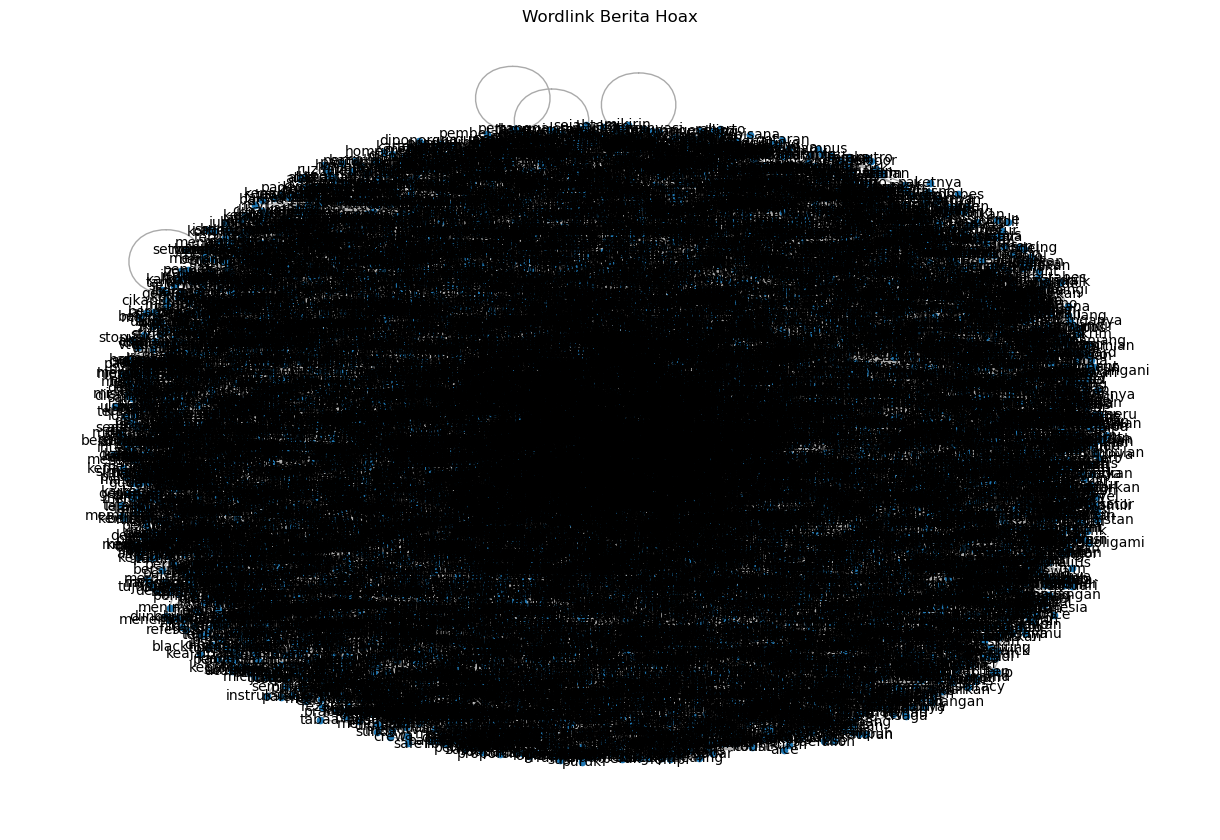

In [104]:
# Wordlink untuk berita hoax
plot_wordlink(hoax_news, 'Wordlink Berita Hoax')